In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

# from scipy import integrate  
# import scipy.signal as scipy
# from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


# Reading .xy data

In [28]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Documents/20220615_XPD_DSE/CsPbBr3_ZnCl2'
subfolder = glob.glob(cwd + '/*bkg*')
subfolder.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Documents/20220615_XPD_DSE/CsPbBr3_ZnCl2/Kapton_empty_bkg
/Users/chenghunglin/Documents/20220615_XPD_DSE/CsPbBr3_ZnCl2/Kapton_toluene_bkg
/Users/chenghunglin/Documents/20220615_XPD_DSE/CsPbBr3_ZnCl2/Tol_OA_bkg


In [29]:
## Reading dark and reference
# dark = glob.glob(cwd + '/dark_ref/' + 'Dark**.csv')
# ref = glob.glob(cwd + '/dark_ref/' + 'Tol_OA**.csv')

# dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
# ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

In [30]:
## Read data into pandas dataframe

df_tth = pd.DataFrame()
df_int = pd.DataFrame()

for i in range(len(subfolder)):
    # data_files = glob.glob(subfolder[i] + '/**tth.chi')
    data_files = glob.glob(subfolder[i] + '/**.xy')
    data_files.sort()
    # del data_files[0]
    suffix = os.path.basename(subfolder[i])

    skiprows = 23 ## skip 23 rows if data processed by dioptas or ## 8
    df_temp = pd.DataFrame()
    
    for j in range(len(data_files)):        
        df = pd.read_csv(data_files[j], skiprows=skiprows, sep='  ', names=[f'tth_{suffix}-{j:02d}', f'{suffix}-{j:02d}'])
        df_temp = pd.concat([df_temp, df[f'{suffix}-{j:02d}']], axis=1, ignore_index=False)
        df_int = pd.concat([df_int, df[f'{suffix}-{j:02d}']], axis=1, ignore_index=False)
    
    df_tth = pd.concat([df_tth, df[f'tth_{suffix}-{j:02d}']], axis=1, ignore_index=False)
    df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    df_int = pd.concat([df_int, df_temp[f'{suffix}_mean']], axis=1, ignore_index=False)
    

/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [31]:
df_temp

,Tol_OA_bkg-00,Tol_OA_bkg_mean
0,266.990326,266.990326
1,269.045807,269.045807
2,266.975769,266.975769
3,275.331360,275.331360
4,276.670685,276.670685
...,...,...
2913,653.705688,653.705688
2914,501.844605,501.844605
2915,251.530182,251.530182
2916,67.992149,67.992149


# Check data in pd dataframe

In [32]:
df_int.keys()

Index(['Kapton_empty_bkg-00', 'Kapton_empty_bkg-01', 'Kapton_empty_bkg-02',
       'Kapton_empty_bkg-03', 'Kapton_empty_bkg_mean', 'Kapton_toluene_bkg-00',
       'Kapton_toluene_bkg-01', 'Kapton_toluene_bkg-02',
       'Kapton_toluene_bkg-03', 'Kapton_toluene_bkg_mean', 'Tol_OA_bkg-00',
       'Tol_OA_bkg_mean'],
      dtype='object')

In [33]:
tth_step = []
for i in range(df_tth.shape[0]-1):
    tth_step.append(df_tth.iloc[i,0] - df_tth.iloc[i+1,0])

In [34]:
tth_step[:10]

[-0.017968199788,
 -0.01796819978,
 -0.01796819978,
 -0.01796819979,
 -0.01796819978,
 -0.01796819979,
 -0.017968199800000015,
 -0.0179681998,
 -0.017968199799999973,
 -0.01796819970000002]

In [35]:
df_tth.shape

(2918, 3)

In [44]:
df_int

,Kapton_empty_bkg-00,Kapton_empty_bkg-01,Kapton_empty_bkg-02,Kapton_empty_bkg-03,Kapton_empty_bkg_mean,Kapton_toluene_bkg-00,Kapton_toluene_bkg-01,Kapton_toluene_bkg-02,Kapton_toluene_bkg-03,Kapton_toluene_bkg_mean,Tol_OA_bkg-00,Tol_OA_bkg_mean
0,43.865501,44.432808,44.432808,44.432808,44.290981,68.000168,68.000168,67.567474,68.432869,68.000170,266.990326,266.990326
1,43.662350,43.621048,43.594555,43.762043,43.659999,67.992722,67.825233,67.516266,67.954872,67.822273,269.045807,269.045807
2,44.071529,43.943466,43.963436,44.083725,44.015539,68.264023,68.216003,67.988701,68.239388,68.177029,266.975769,266.975769
3,44.882141,44.621773,44.778595,44.764877,44.761847,68.862114,68.841881,69.032890,68.946739,68.920906,275.331360,275.331360
4,44.811554,44.538166,44.766636,44.805817,44.730543,68.797577,68.631706,68.815964,68.682831,68.732019,276.670685,276.670685
...,...,...,...,...,...,...,...,...,...,...,...,...
2913,51.644077,39.407982,50.088604,49.465694,47.651589,139.808502,138.407928,139.263779,139.456070,139.234070,653.705688,653.705688
2914,38.792503,19.493238,38.106007,37.200630,33.398095,106.786614,105.167915,104.667732,104.487320,105.277395,501.844605,501.844605
2915,20.133059,4.262781,19.165257,17.987329,15.387106,53.718769,54.923046,52.887398,54.461948,53.997790,251.530182,251.530182
2916,8.286981,NaN,5.472166,3.853122,5.870756,15.380911,15.585741,12.160242,14.590994,14.429472,67.992149,67.992149


# Plot data

In [37]:
# title = ['CsPbBr_200uL_Cl_64', 
#          'CsPbBr_200uL_Cl_32', 
#          'CsPbBr_200uL_Cl_16', 
#          'CsPbBr_200uL_Cl_08', 
#          'CsPbBr_200uL_Cl_0',
#          'CsPbBr_100uL', 
#          'CsPbBr_100uL_I_08uL', 
#          'CsPbBr_100uL_I_16uL', 
#          'CsPbBr_100uL_I_32uL', 
#          'CsPbBr_100uL_I_64uL']

# title = ['00 uL/min', 
#          '08 uL/min', 
#          '16 uL/min', 
#          '32 uL/min', 
#          '64 uL/min']

title = ['Kapton_empty', 'Kapton_toluene', 'Tol_OA_bkg']
         
label = title

## Prepare keys for average scans in pd dataframe

In [38]:
keys_list = list(df_int.keys())
k1 = [k for k in keys_list if 'mean' in k]

## Plot average scans together

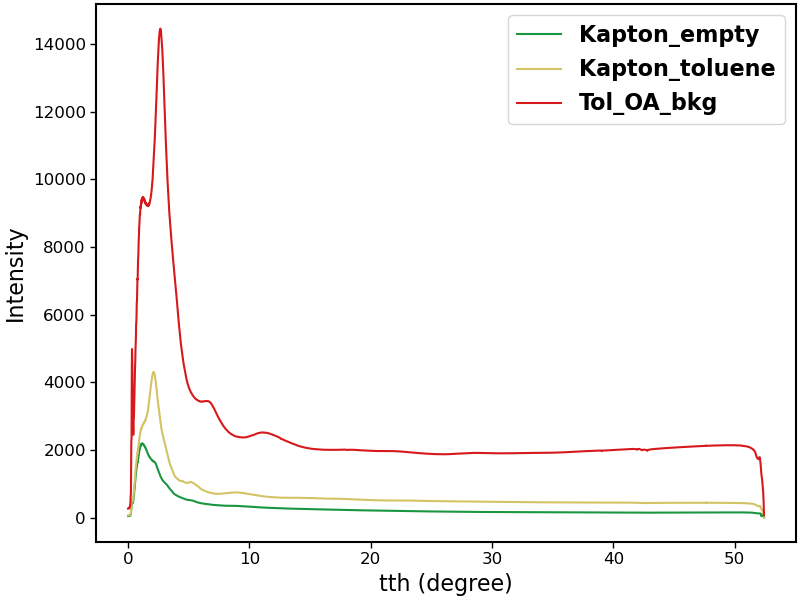

In [39]:
f1, ax1 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int.iloc[:,i], color=cmap(color_idx[i]), label=label[i])
    ax1.plot(df_tth.iloc[:,0], df_int[k1[i]], color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':16}    
ax1.legend(prop=legend_properties)

# ax1.set_xlim(2.6, 11.4)
# ax1.set_ylim(2500, 9500)
ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for indiviual scan in pd dataframe

In [40]:
keys_list = list(df_int.keys())
k2 = []
for i in range(len(subfolder)):
    suffix = os.path.basename(subfolder[i])
    k2.append([k for k in keys_list if suffix in k])

In [42]:
k2[0][3]

'Kapton_empty_bkg-03'

## Plot indiviual scans together

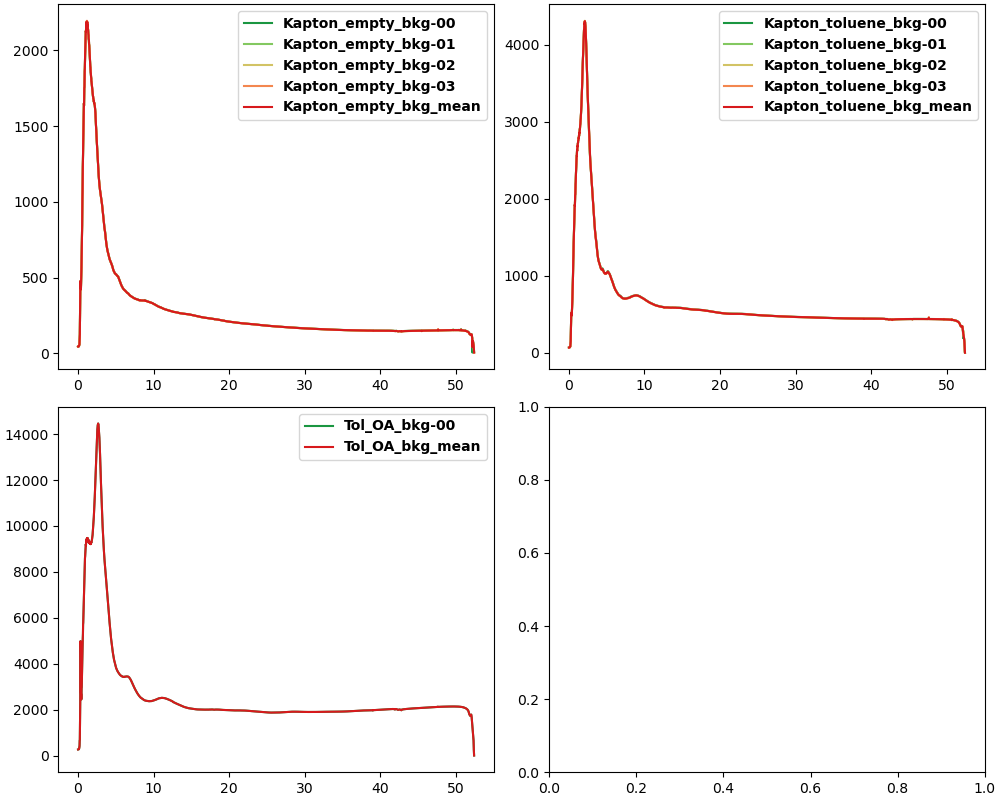

In [43]:
f2, ax2 = plt.subplots(2, 2, figsize = (10, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})
ax2 = ax2.flatten()
legend_properties = {'weight':'bold', 'size':10}

# mpld3.disable_notebook()
label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
for i in range(len(title)):
    for j in range(len(k2[i])):
        color_idx = np.linspace(0, 1, len(k2[i]))
        ax2[i].plot(df_tth.iloc[:,i], df_int[k2[i][j]], color=cmap(color_idx[j]), label=k2[i][j])    
    ax2[i].legend(prop=legend_properties)

# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

# Save average data as another .xy

In [46]:
path = cwd
# name = ['CsPbBr_ZnCl_00', 'CsPbBr_ZnCl_08', 'CsPbBr_ZnCl_16', 'CsPbBr_ZnCl_32', 'CsPbBr_ZnCl_64']
for i in range(len(k1)):
    df = pd.DataFrame()
    df['tth'] = df_tth.iloc[:,i]
    df['Intensity'] = df_int[k1[i]]
    fn = cwd + '/' + k1[i] + '.xy'
    df.to_csv(fn, sep=' ', header=False, index=False, float_format='{:.8e}'.format)
